# Performance benchmarks for LIF layers in Rockpool
This notebook runs and collects results for all benchmarks provided in `rockpool.utilities.benchmarks`.

In [1]:
# - Display a description for the benchmarking system
import rockpool
import os
import datetime
import sys

print(f'Benchmarks run on rockpool version {rockpool.__version__}, on date {datetime.datetime.today()}.')
print(f'Python version {sys.version}')
u = os.uname()
print(f'System descriptor: {u[0]} {u[2]} {u[4]}')

try:
    import jax
    print(f'Jax devices: {jax.devices()}')
except:
    print('Jax not found')

try:
    import torch
    is_cuda_available = torch.cuda.is_available()
    print(f'Torch CUDA available: {is_cuda_available}')
    if is_cuda_available:
        print(f'    Number of devices: {torch.cuda.device_count()}')
        print(f'    CUDA devices: {[torch.cuda.get_device_name(i) for i in range(torch.cuda.device_count())]}')
except:
    pass

Benchmarks run on rockpool version 2.4.dev, on date 2022-11-11 15:29:32.611686.
Python version 3.10.6 (main, Oct 24 2022, 16:07:47) [GCC 11.2.0]
System descriptor: Linux 5.15.0-52-generic x86_64
Jax devices: [StreamExecutorGpuDevice(id=0, process_index=0, slice_index=0)]
Torch CUDA available: True
    Number of devices: 1
    CUDA devices: ['NVIDIA GeForce RTX 3090 Ti']


In [2]:
# - Run all benchmarks and collect results
from rockpool.utilities.benchmarking import benchmark_neurons, plot_benchmark_results, all_lif_benchmarks
import warnings
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (17, 5)

bench_results = []

for benchmark in all_lif_benchmarks:
    try:
        p_fn, c_fn, e_fn, bench_name = benchmark()
        print(f'Running benchmark "{bench_name}"...')

        bench_results.append(benchmark_neurons(p_fn, c_fn, e_fn, bench_name))

    except Exception as e:
        warnings.warn(f'Benchmark {bench_name} failed with error {str(e)}.')

Attempting to run benchmark LIFExodus on a CUDA device...


  0%|          | 0/12 [00:00<?, ?it/s]

Attempting to run benchmark LIF with no acceleration (numpy backend)...


  0%|          | 0/12 [00:00<?, ?it/s]

Attempting to run benchmark LIFTorch using CUDA graph replay acceleration...


  0%|          | 0/12 [00:00<?, ?it/s]

Attempting to run benchmark LIFTorch on a CUDA device...


  0%|          | 0/12 [00:00<?, ?it/s]

Attempting to run benchmark LIFTorch on CPU...


  0%|          | 0/12 [00:00<?, ?it/s]

Attempting to run benchmark LIFJax, no JIT...


  0%|          | 0/12 [00:00<?, ?it/s]

2022-11-11 15:35:16.936702: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/nvptx_compiler.cc:492] The NVIDIA driver's CUDA version is 11.6 which is older than the ptxas CUDA version (11.7.99). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


Attempting to run benchmark LIFJax, with CPU JIT compilation...


  0%|          | 0/12 [00:00<?, ?it/s]

Attempting to run benchmark LIFJax, with GPU JIT compilation...


  0%|          | 0/12 [00:00<?, ?it/s]

Attempting to run benchmark LIFJax, with TPU JIT compilation...


  0%|          | 0/12 [00:00<?, ?it/s]

/home/dylan/rockpool/rockpool/utilities/benchmarking/benchmark_utils.py:128: UserWarning: Benchmarking for layer size 1 failed with error Backend 'tpu' failed to initialize: module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'.
  warnings.warn(f"Benchmarking for layer size {l_size} failed with error {str(e)}.")
/home/dylan/rockpool/rockpool/utilities/benchmarking/benchmark_utils.py:128: UserWarning: Benchmarking for layer size 2 failed with error Backend 'tpu' failed to initialize: module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'.
  warnings.warn(f"Benchmarking for layer size {l_size} failed with error {str(e)}.")
/home/dylan/rockpool/rockpool/utilities/benchmarking/benchmark_utils.py:128: UserWarning: Benchmarking for layer size 5 failed with error Backend 'tpu' failed to initialize: module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'.
  warnings.warn(f"Benchmarking for layer size {l_size} failed with error {str(e)}.")
/home/dylan/rockpool/rockpoo

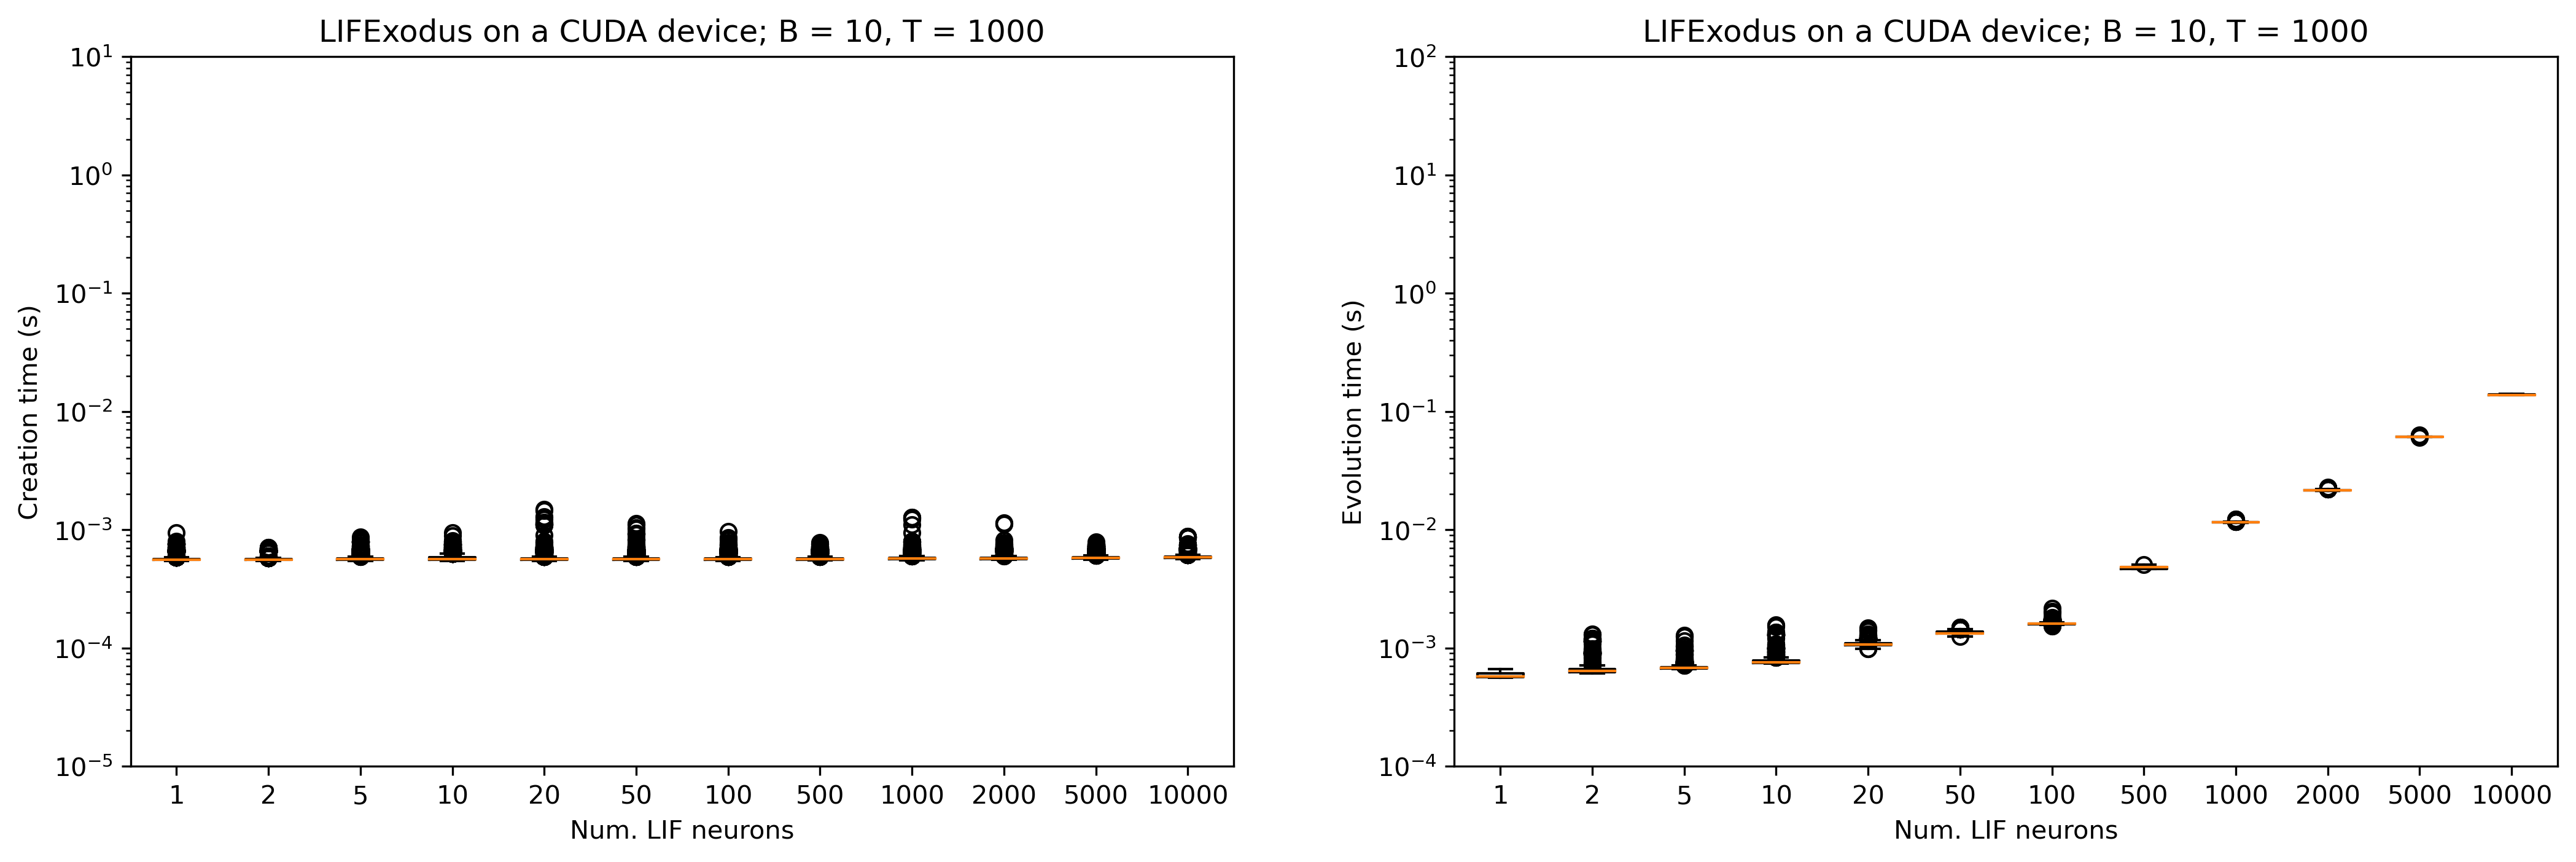

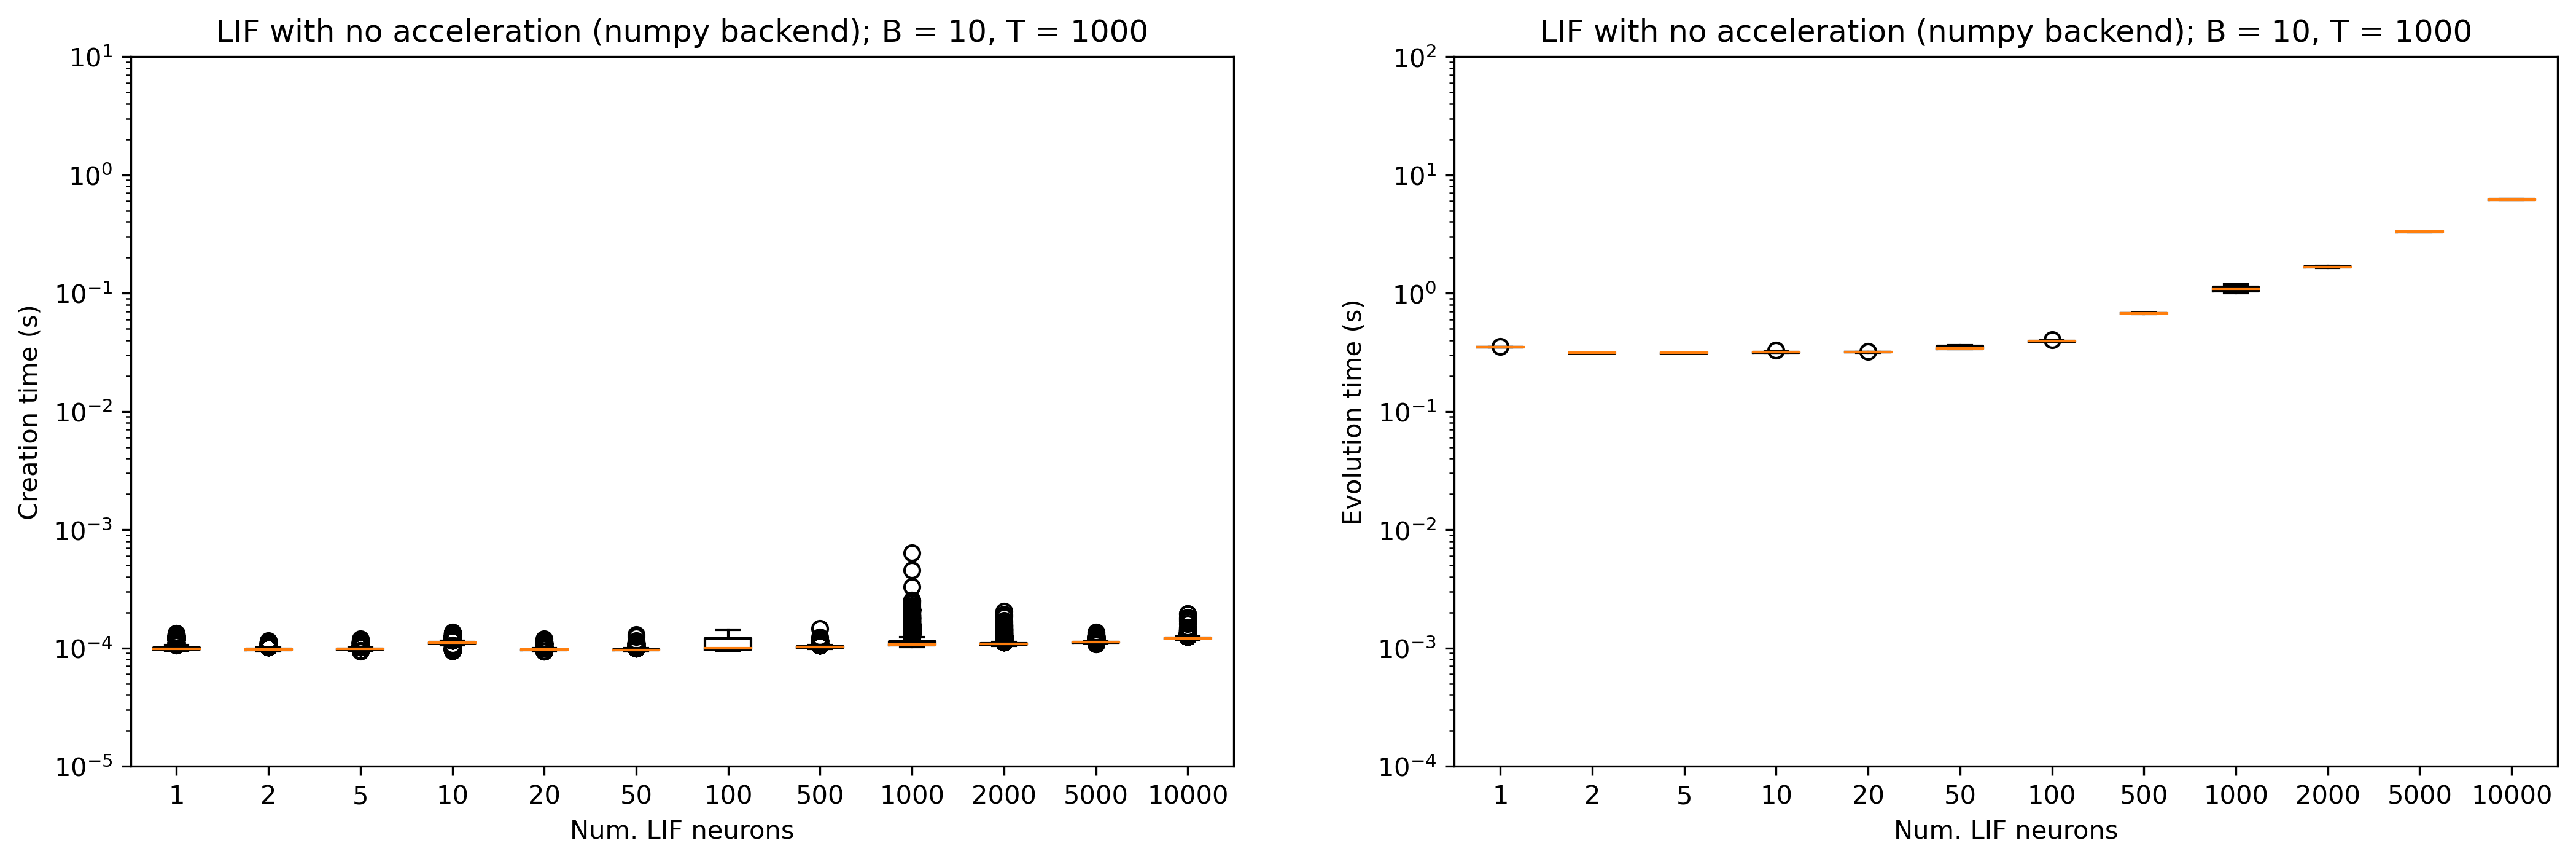

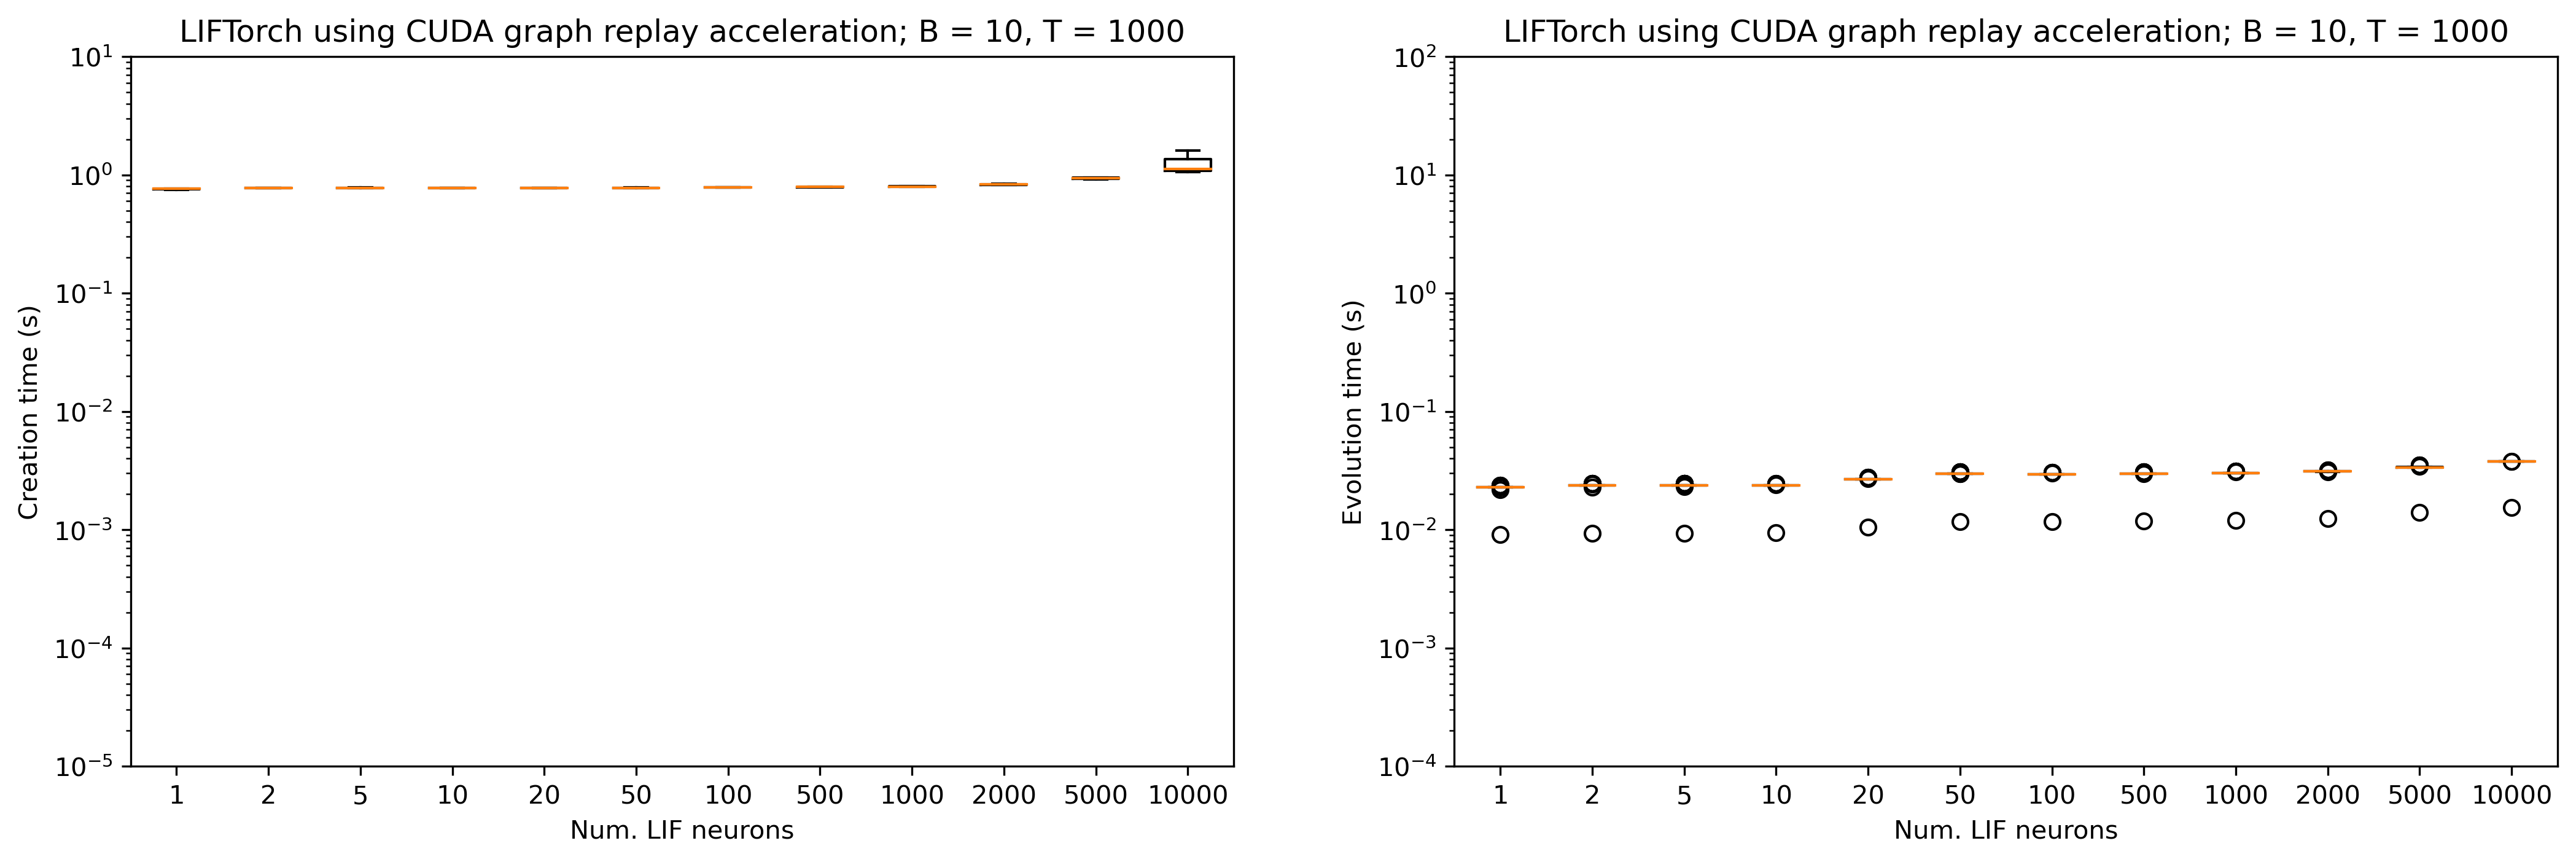

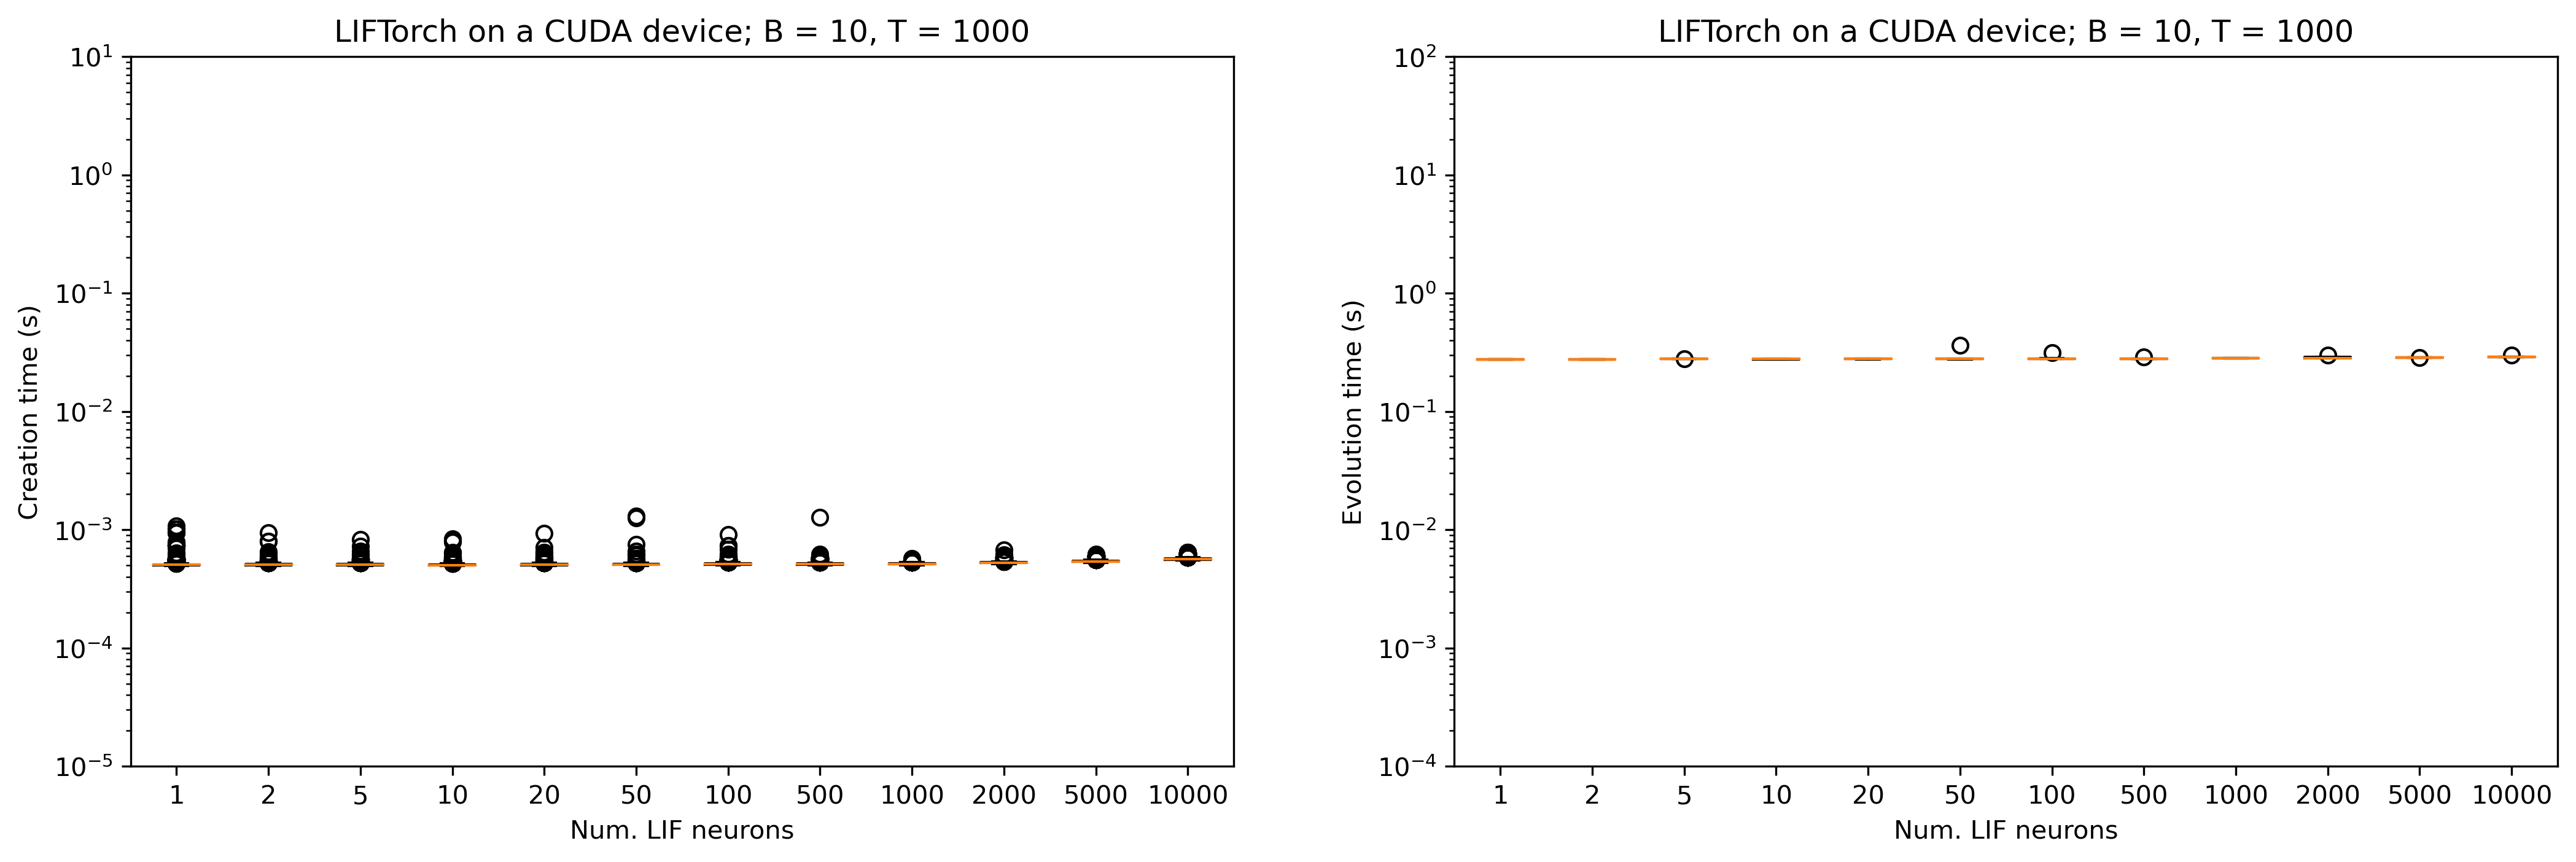

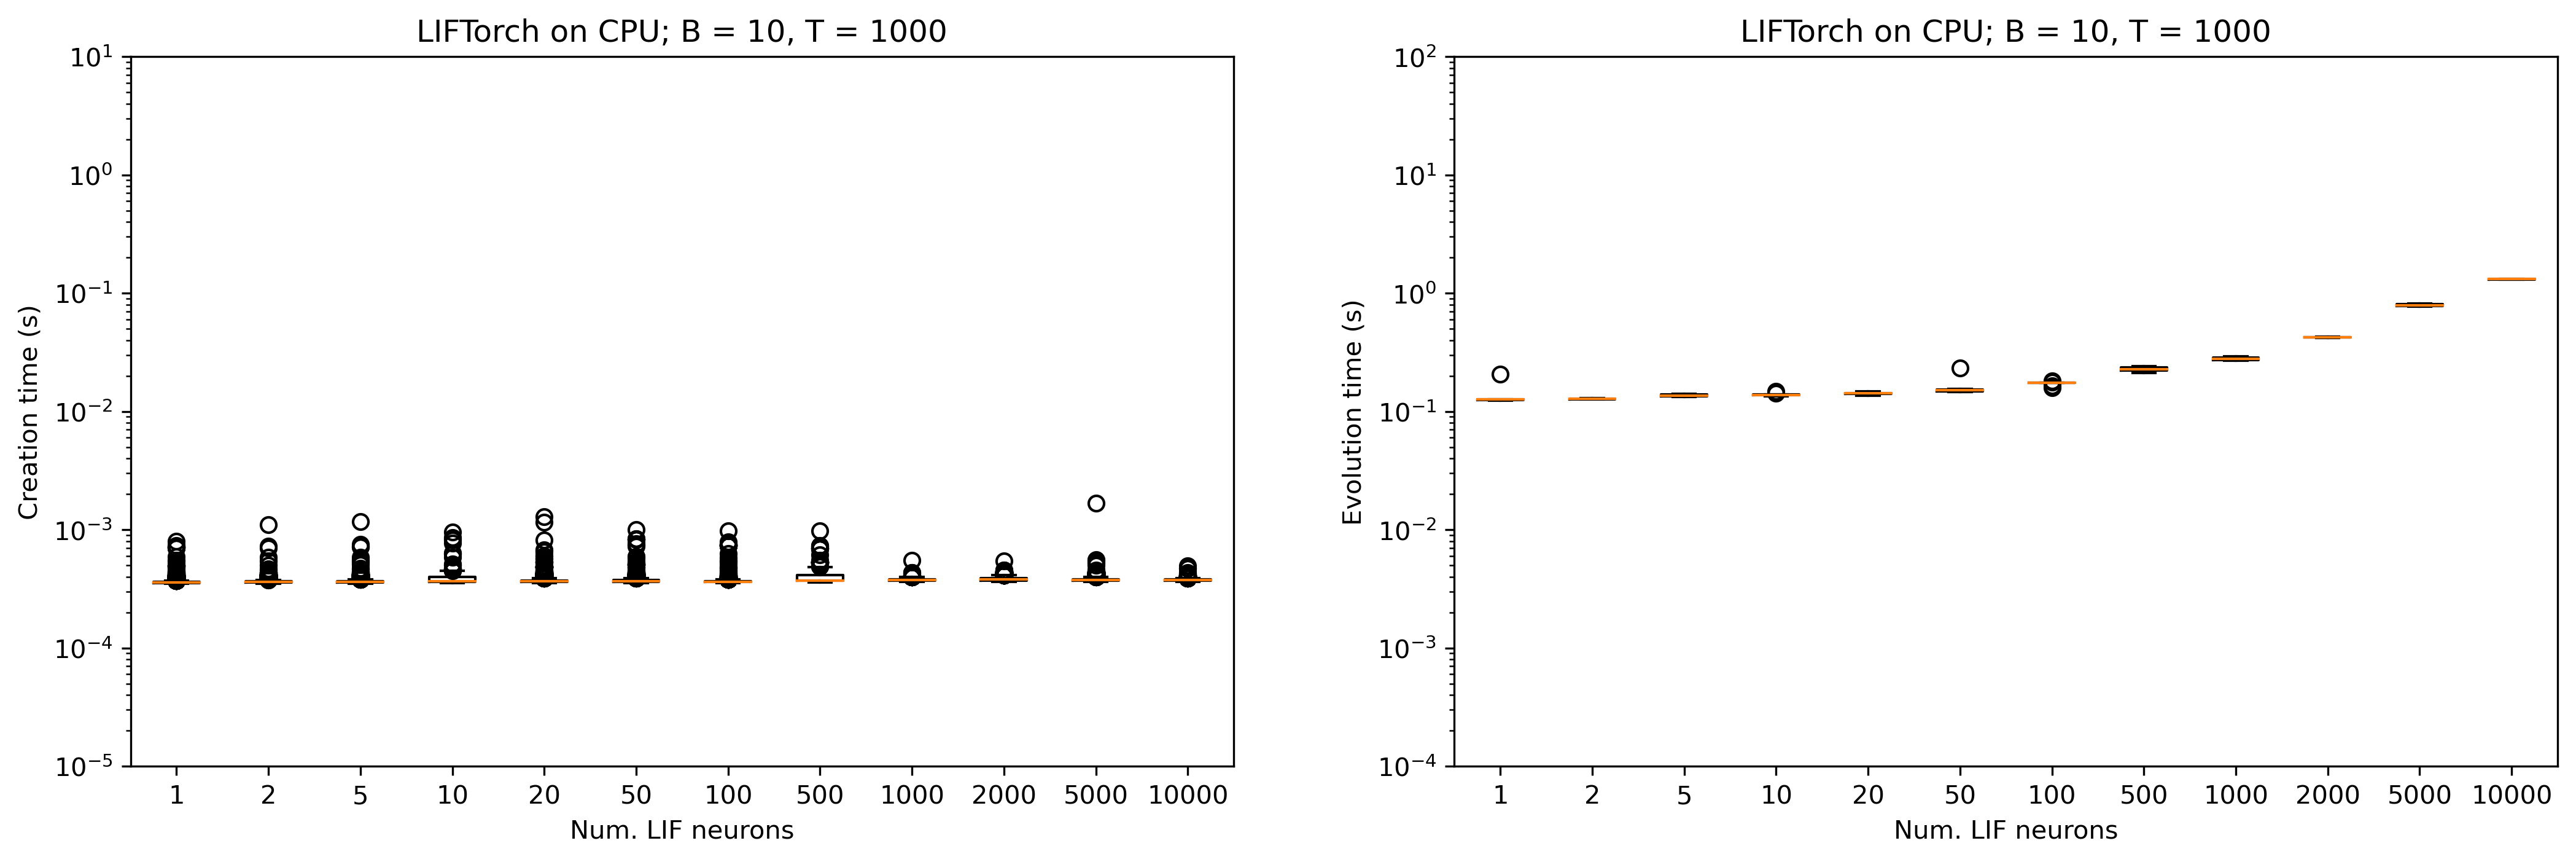

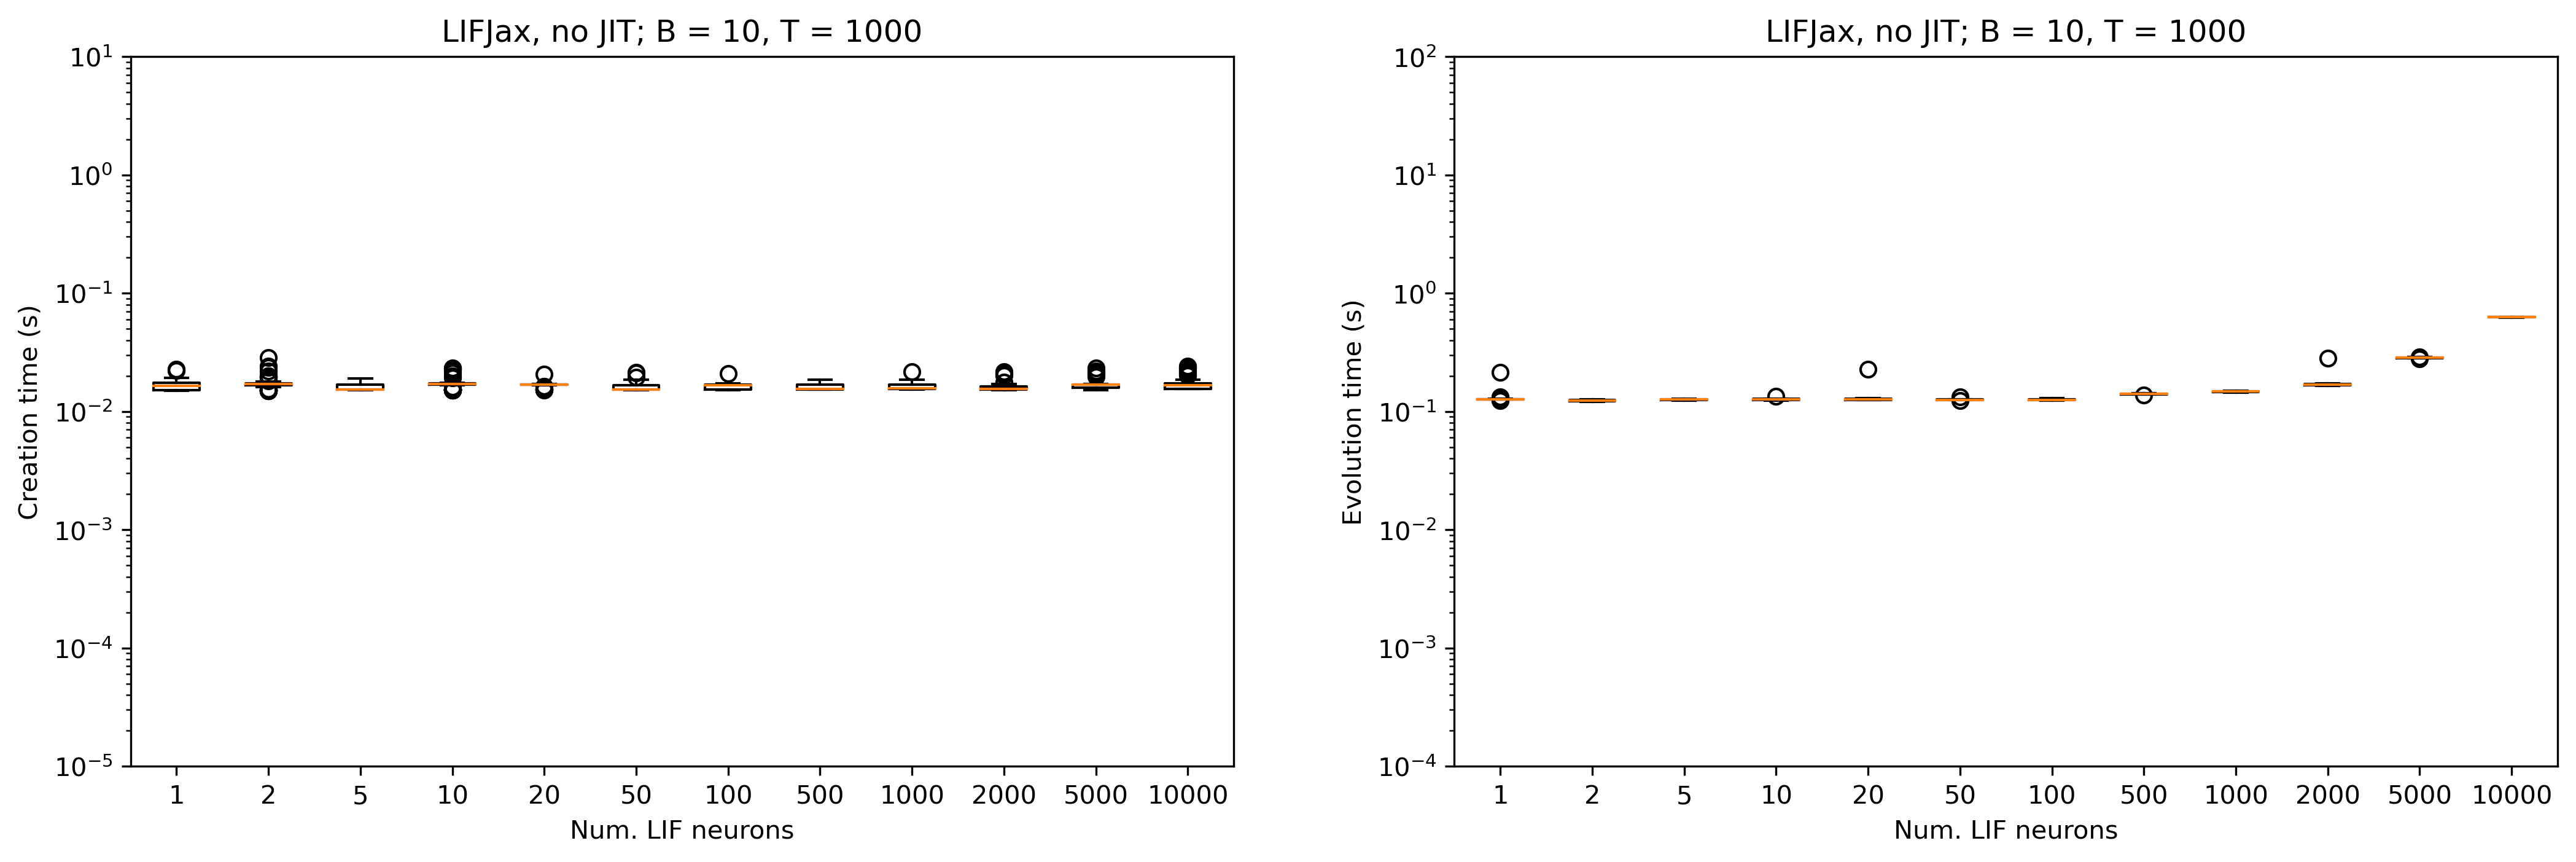

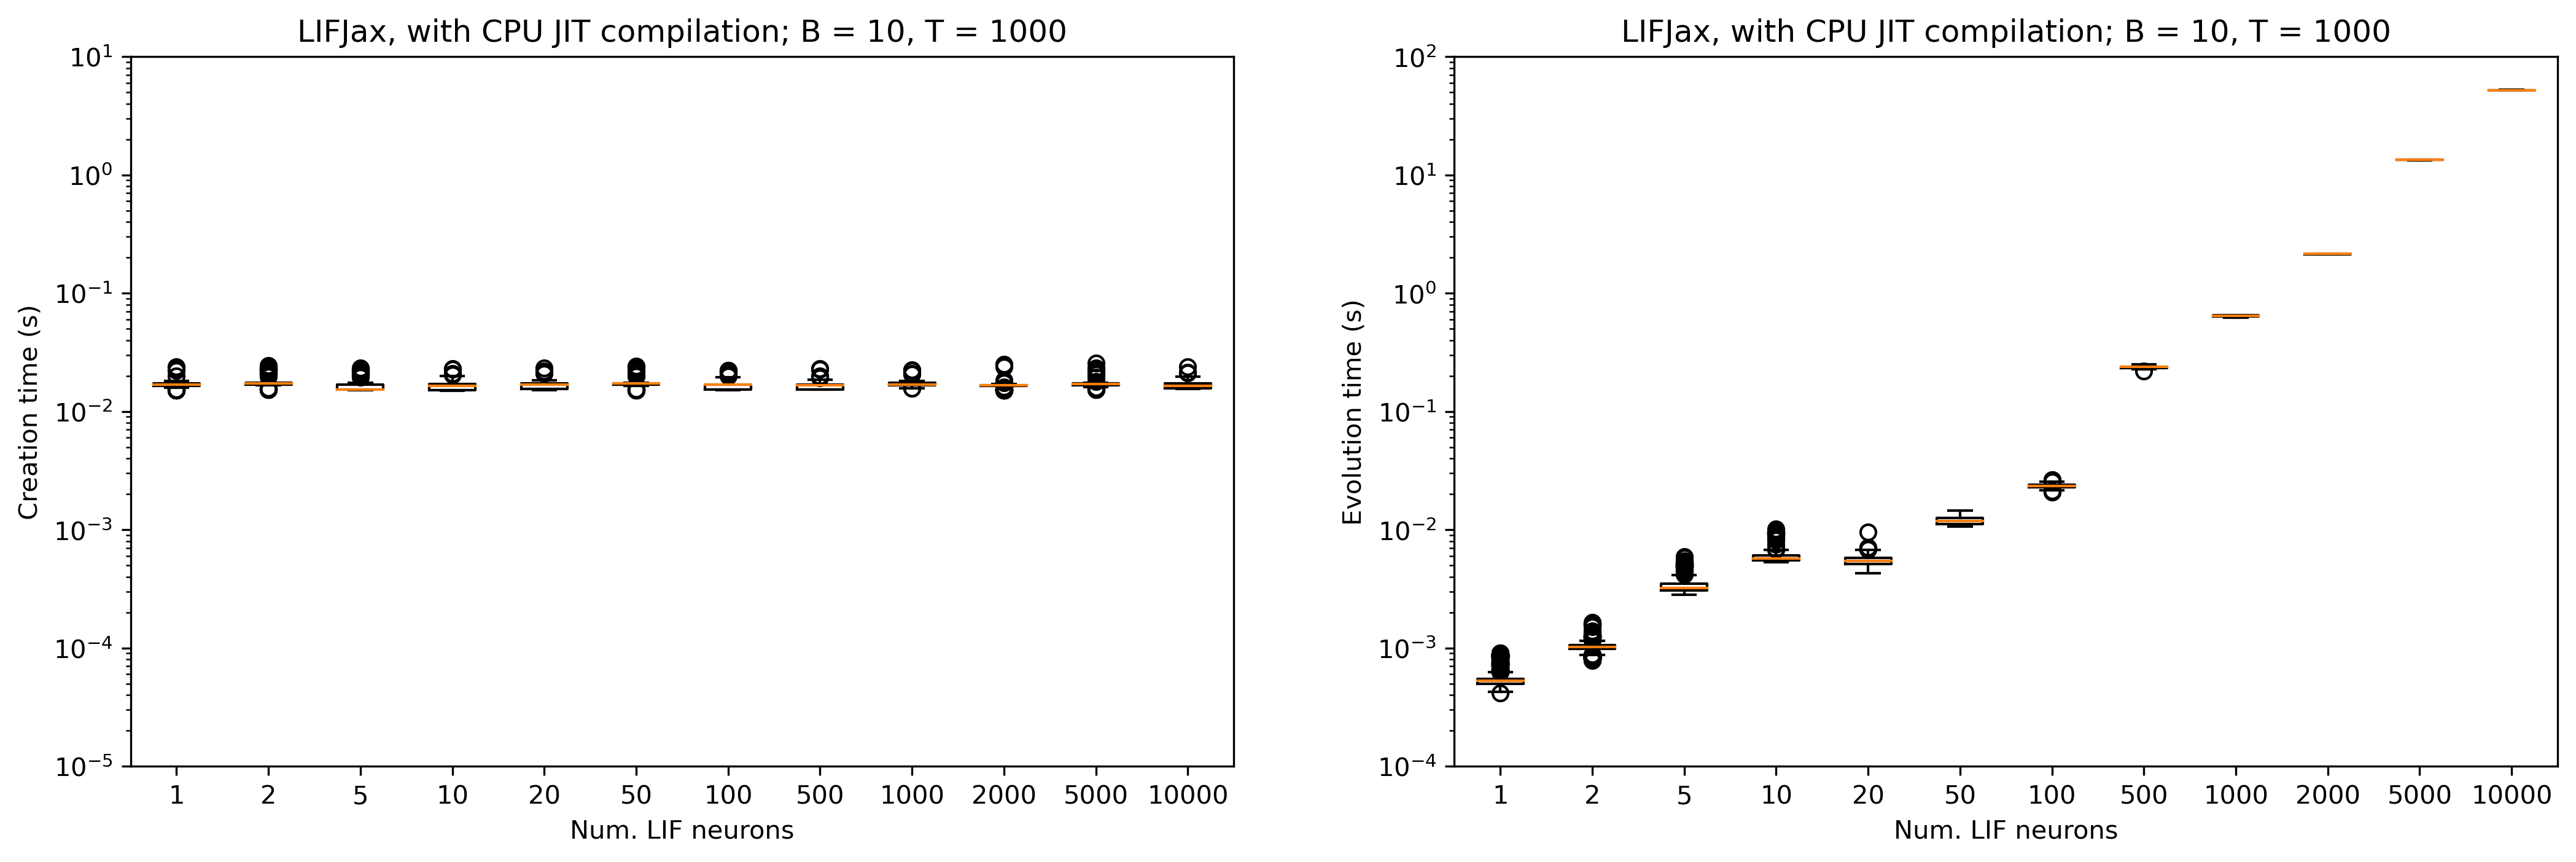

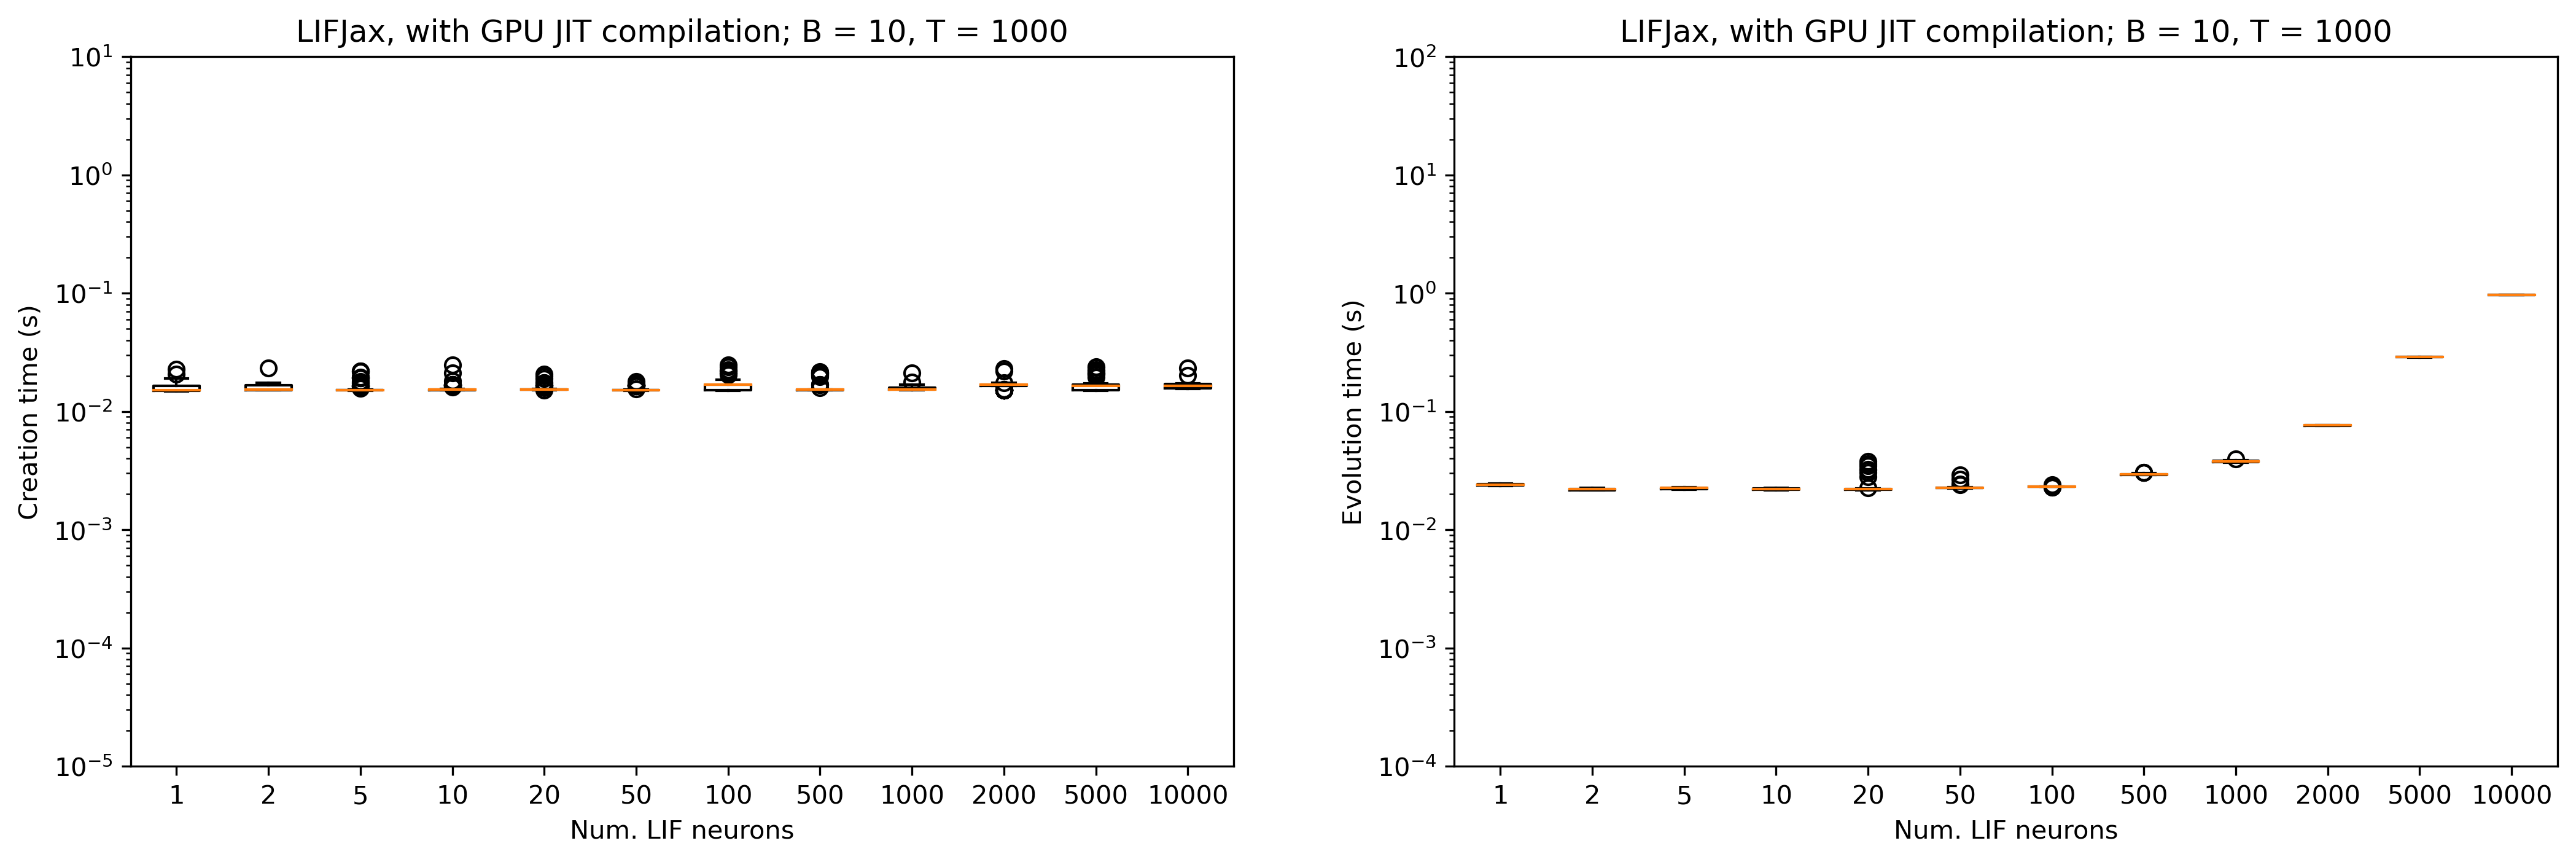

In [19]:
# - Display benchmark results that succeeded
for results in bench_results:
    if not all([len(r) == 0 for r in results[0]]):
        _, axes = plt.subplots(1, 2)
        plot_benchmark_results(*results, axes)